<a href="https://colab.research.google.com/github/FLCL4LIFE/General-Vehicles/blob/main/ground_vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('ground_vehicles.xlsx')

In [ ]:
columns = ['ID', 'Fiscal Year', 'Title', 'Awarded Amount', 'Vendor  Name', 'Vendor  Top Name', 'PSC Name']
cut_df = df[columns]
cut_df

,ID,Fiscal Year,Title,Awarded Amount,Vendor Name,Vendor Top Name,PSC Name
0,261901205,2016,"BEARING,PLAIN,SPHER",NaN,Longhorn Regional Service Center LLC,Longhorn Regional Service Center LLC,(31) BEARINGS
1,261915422,2016,PREVENTATIVE MAINTENANCE SERVICES ON NEPTUNE U...,25990.00,Stryker Corporation,Stryker Corporation,(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...
2,261916094,2016,IGF::CT::IGF STRYKER SERVICE PLAN FOR VA FORT ...,13053.38,Stryker Corporation,Stryker Corporation,(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...
3,261919276,2016,IGF::OT::IGF MAINTENANCE OF PATIENT BEDS OPTIO...,16356.00,"Imaging Diagnostics, Inc.","Imaging Diagnostics, Inc.",(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...
4,261919325,2016,IGF::OT::IGF MAINTENANCE OF STRYKER NAV II SYSTEM,68023.62,Stryker Corporation,Stryker Corporation,(J065) MAINT/REPAIR/REBUILD OF EQUIPMENT- MEDI...
...,...,...,...,...,...,...,...
54374,676404110,2021,PROGRAM MANAGEMENT SUPPORT- ALL ACTIVITIES REQ...,0.00,Dyncorp International LLC,Amentum Government Services Holdings LLC,(M1GZ) OPERATION OF OTHER WAREHOUSE BUILDINGS
54375,676404111,2021,WAR RESERVE MATERIEL - FUNDING ONLY ACTION (FU...,2563626.87,Dyncorp International LLC,Amentum Government Services Holdings LLC,(M1GZ) OPERATION OF OTHER WAREHOUSE BUILDINGS
54376,676404112,2021,WAR RESERVE MATERIEL - FUNDING ONLY ACTION (FU...,0.00,Dyncorp International LLC,Amentum Government Services Holdings LLC,(M1GZ) OPERATION OF OTHER WAREHOUSE BUILDINGS
54377,676547655,2021,PROVIDE RENTAL OR LEASE OF ENDOSCOPIC VIDEO TO...,226322.40,"Stryker Sales, LLC",Stryker Corporation,NaN


In [ ]:


def extract_substrings(title):
    substrings = []
    for keyword in ['abrams tank', 'bradley fighting vehicle', 'stryker armored personnel carrier', 'm1a1', 'm2a1', 'm1130']:

      title = str(title)
      title = title.lower()

      if keyword in title:
            substrings.append(keyword)
    return ', '.join(substrings) if substrings else None

df['Short Title'] = df['Title'].apply(extract_substrings)

unique_values = df['Short Title'].unique()
print(unique_values)



[None 'abrams tank' 'm1a1' 'abrams tank, bradley fighting vehicle' 'm1130'
 'bradley fighting vehicle' 'abrams tank, m1a1'
 'stryker armored personnel carrier']


In [ ]:
import pandas as pd

# Ensure all titles are treated as strings before categorization
def categorize_vehicle(title):
    title = str(title).lower().strip() if pd.notnull(title) else 'other'
    # Consistent categorization to match vehicle references
    if 'abrams tank' in title or 'm1a1' in title:
        return 'Abrams Tank (M1A1)'
    elif 'bradley fighting vehicle' in title or 'm2a1' in title:
        return 'Bradley Fighting Vehicle (M2A1)'
    elif 'stryker armored personnel carrier' in title or 'm1130' in title:
        return 'Stryker Armored Personnel Carrier (M1130)'
    else:
        return 'Other'

# Remove duplicate entries based on 'ID'
df = df.drop_duplicates(subset='ID')

# Apply the function to create the new column
df['Vehicle Type'] = df['Title'].apply(categorize_vehicle)

# Filter dataset to include only the specified vehicle types and fiscal years 2016-2020
filtered_df = df[(df['Vehicle Type'].isin([
    'Abrams Tank (M1A1)',
    'Bradley Fighting Vehicle (M2A1)',
    'Stryker Armored Personnel Carrier (M1130)'
])) & (df['Fiscal Year'].between(2016, 2020))]

# Count the number of records for each vehicle type
abrams_m1a1_count = filtered_df[filtered_df['Vehicle Type'] == 'Abrams Tank (M1A1)'].shape[0]
bradley_count = filtered_df[filtered_df['Vehicle Type'] == 'Bradley Fighting Vehicle (M2A1)'].shape[0]
stryker_count = filtered_df[filtered_df['Vehicle Type'] == 'Stryker Armored Personnel Carrier (M1130)'].shape[0]

# Display the combined counts
print(f"Abrams Tank (M1A1) Combined Raw Count (2016-2020): {abrams_m1a1_count}")
print(f"Bradley Fighting Vehicle (M2A1) Raw Count (2016-2020): {bradley_count}")
print(f"Stryker Armored Personnel Carrier (M1130) Raw Count (2016-2020): {stryker_count}")

Abrams Tank (M1A1) Combined Raw Count (2016-2020): 314
Bradley Fighting Vehicle (M2A1) Raw Count (2016-2020): 105
Stryker Armored Personnel Carrier (M1130) Raw Count (2016-2020): 6


In [ ]:
# Ensure all titles are treated as strings before categorization
def categorize_vehicle(title):
    title = str(title).lower().strip() if pd.notnull(title) else 'other'
    if 'abrams tank' in title or 'm1a1' in title:
        return 'Abrams Tank (M1A1)'
    elif 'bradley fighting vehicle' in title or 'm2a1' in title:
        return 'Bradley Fighting Vehicle (M2A1)'
    elif 'stryker armored personnel carrier' in title or 'm1130' in title:
        return 'Stryker Armored Personnel Carrier (M1130)'
    else:
        return 'Other'

# Remove duplicate entries based on 'ID'
df = df.drop_duplicates(subset='ID')

# Apply the function to create the new column
df['Vehicle Type'] = df['Title'].apply(categorize_vehicle)

# Filter dataset to include only the specified vehicle types and fiscal years 2016-2020
filtered_df = df[(df['Vehicle Type'].isin([
    'Abrams Tank (M1A1)',
    'Bradley Fighting Vehicle (M2A1)',
    'Stryker Armored Personnel Carrier (M1130)'
])) & (df['Fiscal Year'].between(2016, 2020))]

# Sum the awarded amounts for each vehicle type
sums_per_vehicle = filtered_df.groupby('Vehicle Type')['Awarded Amount'].sum().reset_index()
sums_per_vehicle['Awarded Amount'] = sums_per_vehicle['Awarded Amount'].apply(lambda x: f"${x:,.2f}")

# **Define yearly_sums_per_vehicle before printing**
yearly_sums_per_vehicle = filtered_df.groupby(['Fiscal Year', 'Vehicle Type'])['Awarded Amount'].sum().reset_index()
yearly_sums_per_vehicle['Awarded Amount'] = yearly_sums_per_vehicle['Awarded Amount'].apply(lambda x: f"${x:,.2f}")

# Total count and awarded amount per vehicle type
summary_per_vehicle = filtered_df.groupby('Vehicle Type').agg({
    'ID': 'count',
    'Awarded Amount': 'sum'
}).reset_index()
summary_per_vehicle.rename(columns={'ID': 'Total Count'}, inplace=True)
summary_per_vehicle['Awarded Amount'] = summary_per_vehicle['Awarded Amount'].apply(lambda x: f"${x:,.2f}")

# Display results
print("Yearly Spending Per Vehicle Type (2016-2020):")
print(yearly_sums_per_vehicle)

print("\nTotal Counts and Awarded Amounts per Vehicle Type (2016-2020):")
print(summary_per_vehicle)


Yearly Spending Per Vehicle Type (2016-2020):
    Fiscal Year                               Vehicle Type     Awarded Amount
0          2016                         Abrams Tank (M1A1)    $151,788,506.55
1          2016            Bradley Fighting Vehicle (M2A1)     $40,331,662.50
2          2016  Stryker Armored Personnel Carrier (M1130)         $93,795.80
3          2017                         Abrams Tank (M1A1)     $99,325,682.09
4          2017            Bradley Fighting Vehicle (M2A1)      $3,681,281.56
5          2018                         Abrams Tank (M1A1)  $1,526,727,171.02
6          2018            Bradley Fighting Vehicle (M2A1)     $55,731,234.33
7          2018  Stryker Armored Personnel Carrier (M1130)              $0.00
8          2019                         Abrams Tank (M1A1)    $187,504,854.77
9          2019            Bradley Fighting Vehicle (M2A1)    $146,409,963.70
10         2020                         Abrams Tank (M1A1)     $71,578,475.35
11         2020   

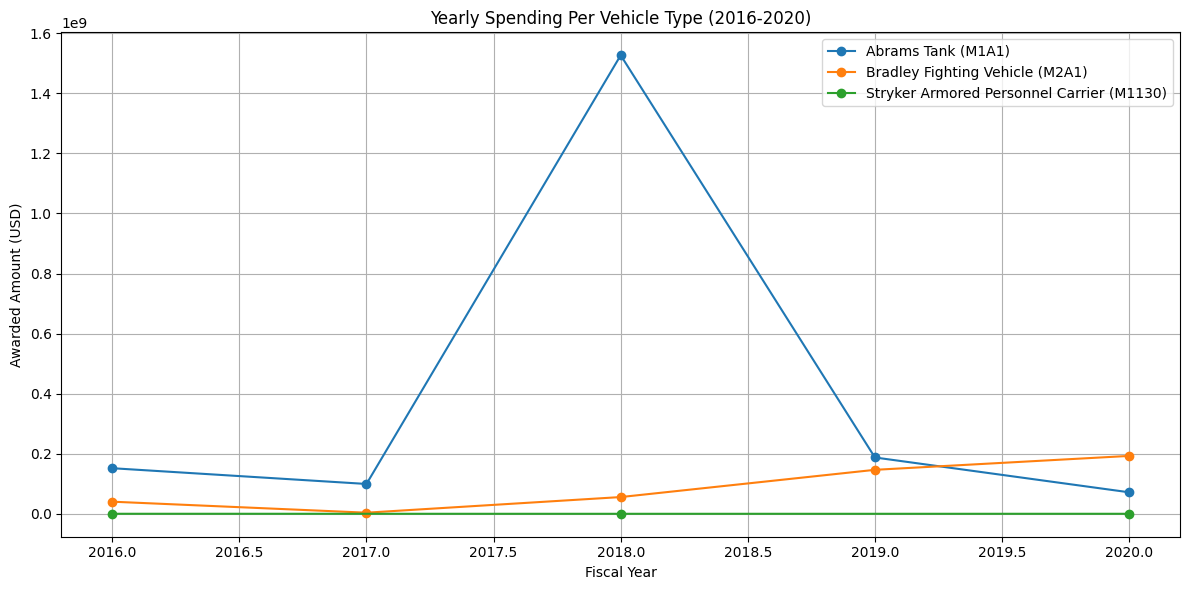

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure all titles are treated as strings before categorization
def categorize_vehicle(title):
    title = str(title).lower().strip() if pd.notnull(title) else 'other'
    # Consistent categorization to match vehicle references
    if 'abrams tank' in title or 'm1a1' in title:
        return 'Abrams Tank (M1A1)'
    elif 'bradley fighting vehicle' in title or 'm2a1' in title:
        return 'Bradley Fighting Vehicle (M2A1)'
    elif 'stryker armored personnel carrier' in title or 'm1130' in title:
        return 'Stryker Armored Personnel Carrier (M1130)'
    else:
        return 'Other'

# Remove duplicate entries based on 'ID'
df = df.drop_duplicates(subset='ID')

# Apply the function to create the new column
df['Vehicle Type'] = df['Title'].apply(categorize_vehicle)

# Filter dataset to include only the specified vehicle types and fiscal years 2016-2020
filtered_df = df[(df['Vehicle Type'].isin([
    'Abrams Tank (M1A1)',
    'Bradley Fighting Vehicle (M2A1)',
    'Stryker Armored Personnel Carrier (M1130)'
])) & (df['Fiscal Year'].between(2016, 2020))]

# Group data by fiscal year and vehicle type, summing the awarded amounts
yearly_sums_per_vehicle = filtered_df.groupby(['Fiscal Year', 'Vehicle Type'])['Awarded Amount'].sum().reset_index()

# Total count and total awarded amount per vehicle type
summary_per_vehicle = filtered_df.groupby('Vehicle Type').agg(
    Total_Count=('Vehicle Type', 'count'),
    Awarded_Amount=('Awarded Amount', 'sum')
).reset_index()

# Plotting the yearly spending per vehicle type
plt.figure(figsize=(12, 6))
for vehicle in yearly_sums_per_vehicle['Vehicle Type'].unique():
    data = yearly_sums_per_vehicle[yearly_sums_per_vehicle['Vehicle Type'] == vehicle]
    plt.plot(data['Fiscal Year'], data['Awarded Amount'], marker='o', label=vehicle)

plt.title('Yearly Spending Per Vehicle Type (2016-2020)')
plt.xlabel('Fiscal Year')
plt.ylabel('Awarded Amount (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


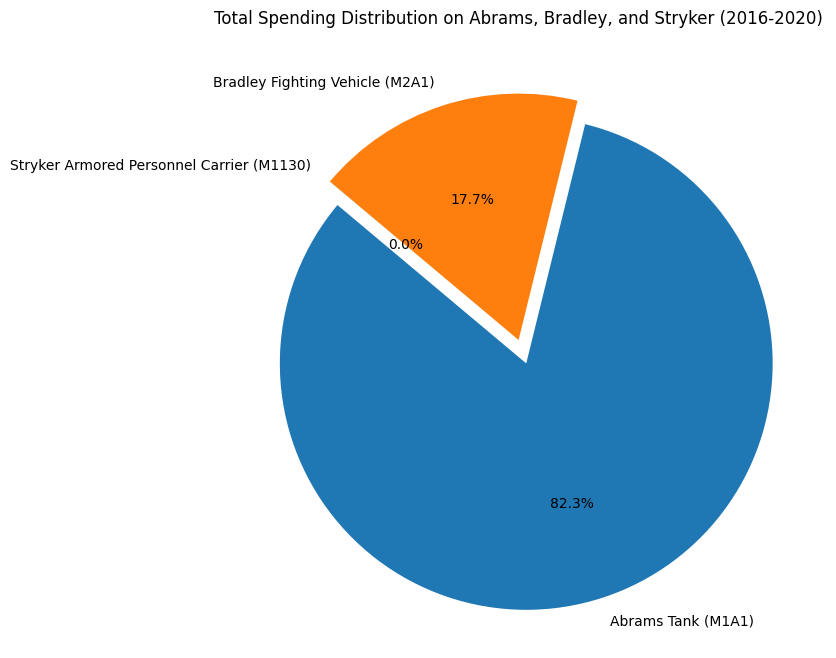

In [ ]:
# Create a pie chart to show total spending distribution from 2016-2020

# Extracting total awarded amounts per vehicle type
total_spending = filtered_df.groupby('Vehicle Type')['Awarded Amount'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_spending, labels=total_spending.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0, 0))
plt.title('Total Spending Distribution on Abrams, Bradley, and Stryker (2016-2020)')
plt.show()
